<a href="https://colab.research.google.com/github/rifqihilal/Data_Science/blob/main/Final_Project_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

Data Collection and Pre-Processing

In [ ]:
# Memuat data csv ke dalam dataframe
movies_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies.csv')

In [ ]:
# Menampilkan 5 baris pertama dari dataframe
movies_data.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
# Jumlah baris dan kolom dalam dataframe

movies_data.shape

(4803, 24)

In [ ]:
movies_data.columns  #name of columns in movies_metadat

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [ ]:
movies_data[movies_data['original_title']!=movies_data['title']][['title','original_title']].head()

,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


In [ ]:
movies_data=movies_data.drop('original_title',axis=1) #drop 'original_title' column from movies_ metadata

In [ ]:
#'revenue' in movies_metadata have lots value is zero.
movies_data[movies_data['revenue']==0].shape

(1427, 23)

Text(0.5, 1.0, 'Popular Movies')

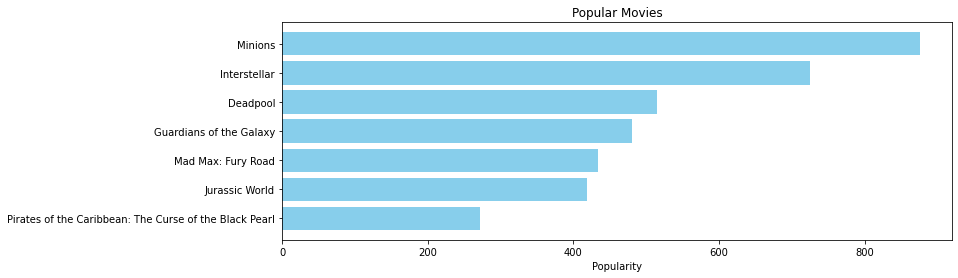

In [ ]:
pop= movies_data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(7),pop['popularity'].head(7), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, '%_Missing_Data')

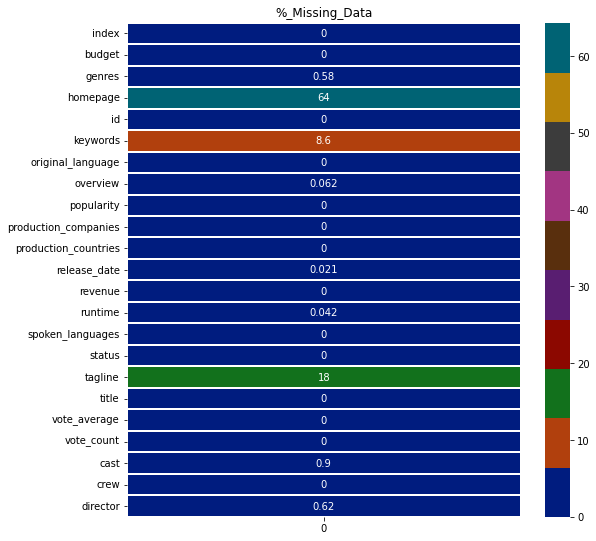

In [ ]:
#percentage of missing data
plt.figure(figsize=(30,20))                        #calculating the % of missing Data for each column.
plt.subplot(234)
sns.heatmap(pd.DataFrame((movies_data.isnull().sum()*100)/movies_data.shape[0]),annot=True,cmap=sns.color_palette("dark"),linewidths=1,linecolor="white")
plt.title("%_Missing_Data")

In [ ]:
# Memilih feature/kolom yang cocok untuk rekomendasi

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
# Mengganti value null dengan string null

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
# Menggabungkan semua feature yang dipilih

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [ ]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# Mengkonversi data teks menjadi feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

Cosine Similarity

In [ ]:
# Mendapatkan similarity scores menggunakan cosine similarity

similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [ ]:
# Mendapatkan nama film dari pengguna

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : Super


In [ ]:
# Membuat daftar dengan semua judul film dari dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# Mencari kecocokan paling dekat dari judl film yang di inputkan pengguna 

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Super', 'Super 8', 'Superman']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Super


In [ ]:
# Menemukan indeks film dengan judul

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

4033


In [ ]:
# Mendapatkan daftar film serupa

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.020474807198695936), (1, 0.030011238091859644), (2, 0.01663517705481598), (3, 0.032674343868676695), (4, 0.006516152885704707), (5, 0.021210297257526822), (6, 0.0), (7, 0.11191835796172825), (8, 0.0), (9, 0.1079979701992899), (10, 0.044602654726719385), (11, 0.01444375990521652), (12, 0.0068327002026478175), (13, 0.0188750545110344), (14, 0.12785569779069395), (15, 0.0), (16, 0.10612239382703968), (17, 0.025270519635620214), (18, 0.010858491671896453), (19, 0.005803148104685337), (20, 0.04140674668645501), (21, 0.0056160863613537735), (22, 0.0), (23, 0.0), (24, 0.00955526142111276), (25, 0.017337379799790165), (26, 0.04331558487772592), (27, 0.006095924299151108), (28, 0.006692605502269841), (29, 0.0070014618916746365), (30, 0.05579686388448166), (31, 0.040861980957721575), (32, 0.0), (33, 0.11122297565164799), (34, 0.0), (35, 0.10485155538528064), (36, 0.006349472744189545), (37, 0.014492263263591012), (38, 0.11316058968033575), (39, 0.00630211856512122), (40, 0.036814886771311

In [ ]:
len(similarity_score)

4803

In [ ]:
# Menyortir film berdasarkan similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(4033, 1.0), (1720, 0.18805509396725037), (174, 0.18325960042601455), (2509, 0.17586435127126174), (4759, 0.17377425187246887), (3504, 0.14652562040804168), (4532, 0.13142217324198452), (101, 0.12976811208837438), (14, 0.12785569779069395), (254, 0.12741184070120803), (3334, 0.1252044781668925), (4436, 0.12251913102562376), (1005, 0.1219169003339444), (3962, 0.12029364857962653), (1626, 0.12013985524391424), (64, 0.11993035757649247), (683, 0.11987824739424874), (46, 0.11983313711575465), (4022, 0.11858471205093861), (919, 0.11621145901123116), (4648, 0.11474987623479718), (94, 0.11460413364295309), (4395, 0.11352582791924719), (38, 0.11316058968033575), (511, 0.11298010728348822), (1416, 0.11227394101840937), (7, 0.11191835796172825), (3864, 0.11153489076812557), (33, 0.11122297565164799), (96, 0.11088514790052266), (2065, 0.10987599140615216), (293, 0.10865734515357814), (9, 0.1079979701992899), (735, 0.10763749937669054), (788, 0.10693770249910804), (182, 0.10654460111565493), (602

In [ ]:
# Menampilkan nama film serupa berdasarkan indeks

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Super
2 . Kick-Ass
3 . The Incredible Hulk
4 . Slither
5 . The Image Revolution
6 . 11:14
7 . Lonesome Jim
8 . X-Men: First Class
9 . Man of Steel
10 . The Smurfs
11 . Juno
12 . Hard Candy
13 . Traffic
14 . Open Road
15 . My Super Ex-Girlfriend
16 . X-Men: Apocalypse
17 . 3000 Miles to Graceland
18 . X-Men: Days of Future Past
19 . Robot & Frank
20 . Payback
21 . On the Outs
22 . Guardians of the Galaxy
23 . The Specials
24 . The Amazing Spider-Man 2
25 . X-Men
26 . Jersey Girl
27 . Avengers: Age of Ultron
28 . Choke
29 . X-Men: The Last Stand


Movie Recommendation Sytem

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Super
Movies suggested for you : 

1 . Super
2 . Kick-Ass
3 . The Incredible Hulk
4 . Slither
5 . The Image Revolution
6 . 11:14
7 . Lonesome Jim
8 . X-Men: First Class
9 . Man of Steel
10 . The Smurfs
11 . Juno
12 . Hard Candy
13 . Traffic
14 . Open Road
15 . My Super Ex-Girlfriend
16 . X-Men: Apocalypse
17 . 3000 Miles to Graceland
18 . X-Men: Days of Future Past
19 . Robot & Frank
20 . Payback
21 . On the Outs
22 . Guardians of the Galaxy
23 . The Specials
24 . The Amazing Spider-Man 2
25 . X-Men
26 . Jersey Girl
27 . Avengers: Age of Ultron
28 . Choke
29 . X-Men: The Last Stand


In [ ]:
num_cols = movies_data.select_dtypes(include=np.number).columns
num_cols
non_num_cols = movies_data.select_dtypes(exclude=np.number).columns
non_num_cols
label_encoder = LabelEncoder()
for i in non_num_cols:
    movies_data[i] = label_encoder.fit_transform(movies_data[i])
movies_data.head(10)

,index,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,60,461,19995,1026,7,2524,150.437577,1392,...,162.0,179,1,733,379,7.2,11800,3973,4133,888
1,1,300000000,328,56,285,2749,7,1662,139.082615,3536,...,169.0,383,1,415,2648,6.9,4500,2293,1010,772
2,2,245000000,30,1281,206647,3637,7,213,107.376788,526,...,148.0,403,1,98,3181,6.3,4466,967,4447,1972
3,3,250000000,131,1378,49026,1078,7,2076,112.312950,1559,...,165.0,383,1,2689,3612,7.6,9106,801,1762,362
4,4,260000000,72,217,49529,366,7,2794,43.926995,3573,...,132.0,383,1,1825,1901,6.1,2124,4330,196,97
5,5,258000000,806,1284,559,1208,7,3931,115.699814,564,...,139.0,251,1,2776,3193,5.9,3576,4399,1483,1975
6,6,260000000,397,64,38757,1820,7,4648,48.681969,3563,...,100.0,383,1,3285,3361,7.4,3330,4731,2363,273
7,7,280000000,72,190,99861,2367,7,4481,134.279229,1701,...,141.0,383,1,88,380,7.3,6767,3780,998,1181
8,8,250000000,349,136,767,4157,7,1394,98.885637,3602,...,153.0,383,1,636,1582,7.4,5293,987,643,533
9,9,250000000,57,474,209112,1084,7,2036,155.790452,687,...,151.0,383,1,1694,440,5.7,7004,369,1771,2338


In [ ]:
x = pd.DataFrame(np.c_[movies_data['budget']], columns = ['budget'])
y = movies_data['popularity']

print(x)
print(y)

         budget
0     237000000
1     300000000
2     245000000
3     250000000
4     260000000
...         ...
4798     220000
4799       9000
4800          0
4801          0
4802          0

[4803 rows x 1 columns]
0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4798     14.269792
4799      0.642552
4800      1.444476
4801      0.857008
4802      1.929883
Name: popularity, Length: 4803, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3842, 1)
(961, 1)
(3842,)
(961,)


In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

intercept_lin_reg = lin_reg.intercept_
print(intercept_lin_reg)

coeffecient_lin_reg = lin_reg.coef_
print(coeffecient_lin_reg)

9.899821564118412
[4.06737704e-07]


In [ ]:
fitur_cols = ['budget','genres','keywords','tagline','cast','director']
X = movies_data[fitur_cols]
y = movies_data['popularity']
list(zip(fitur_cols, lin_reg.coef_))

[('budget', 4.06737703741464e-07)]

In [ ]:
ypredict=lin_reg.predict(x_test)

In [ ]:
print("Coeffecient of determination : ",r2_score(y_test,ypredict))
print("MSE : ",mean_squared_error(y_test,ypredict))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,ypredict)))

Coeffecient of determination :  0.30682510610025426
MSE :  369.81725103941704
RMSE :  19.230633141927935


In [ ]:
movies_data[fitur_cols].corr()

,budget,genres,keywords,tagline,cast,director
budget,1.000000,-0.207834,0.061423,0.169009,0.004979,0.006674
genres,-0.207834,1.000000,0.002360,-0.018456,0.010368,0.017113
keywords,0.061423,0.002360,1.000000,0.074815,0.000100,0.011804
tagline,0.169009,-0.018456,0.074815,1.000000,0.037595,-0.003033
cast,0.004979,0.010368,0.000100,0.037595,1.000000,0.061627
director,0.006674,0.017113,0.011804,-0.003033,0.061627,1.000000


In [ ]:
movies_data_predict = pd.DataFrame({'Actual': y_test, 'Predict': ypredict})
movies_data_predict.head(10)

,Actual,Predict
3857,3.158056,11.323404
3740,8.988455,11.526772
2329,9.642041,9.899822
2222,9.361460,18.034576
2114,15.341196,18.034576
4273,0.430758,9.899822
2482,9.455596,18.034576
3314,4.820166,14.082925
4746,0.176377,9.899822
741,37.378081,34.710821


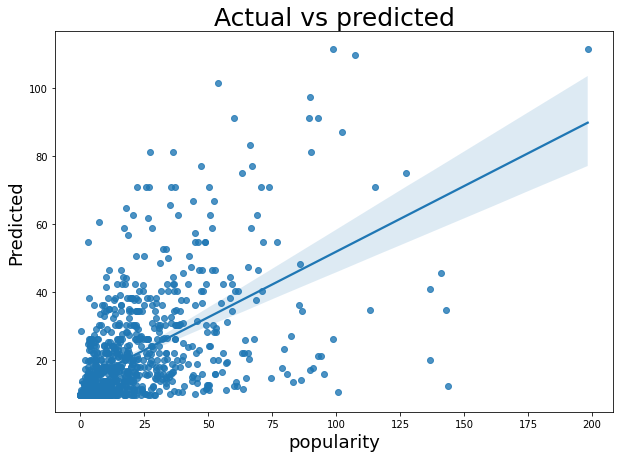

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs predicted",fontsize=25)
plt.xlabel("Actual",fontsize=18)
plt.ylabel("Predicted", fontsize=18)
#plt.scatter(x=test_y,y=test_predict)
sns.regplot(x=y_test, y=ypredict)
plt.show()
